## 2. 경사 하강법(Gradient Descent)

선형 회귀에서 실제값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 `잔차`라고 부른다.  
최적의 회귀 모델을 만든다는 것은 전체 데이터의 잔차의 합이 최소가 되는 모델을 만든다는 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미  
  
오류 값은 + 나 - 가 될 수 있다. 따라서 오류 값을 함부로 더하고 빼면 뜻하지 않게 오류의 합이 줄어들거나 커질 수 가 있다. 그래서 우리는 오류값에 절대값을 씌워 계산하거나 제곱의 합을 구하여 계산을 진행한다.
일반적으로 오류 값의 제곱을 구해서 더하는 방식(RSS)을 취한다.  
  
즉, $Error^2 = RSS$  
  
`RSS`는 이제 변수가 $w_0, w_1$인 식으로 표현할 수 있으며, 이 $w_0, w_1$를 최소화 하는 것이 머신러닝 기반 회귀의 핵심이다.  
(학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주함을 주의해아 함)  
  
일반적으로 RSS는 학습 데이터의 건수로 나누어서 다음과 같이 정규화된 식으로 표현한다.  

$$ RSS(w_0,w_1) = \frac{1}{N} \sum_{i=1}^N (y_i-(w_0+w_1*x_i))^2$$  
  
회귀에서 RSS는 비용(Cost)이며 w변수(회귀 계수)로 구성되는 RSS를 `비용함수`라고 한다  
머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값을 지속해서 감소시키고, 최종적으로는 더 이상 감소하지 않은 최소의 오류값을 구하는 것.  
  
비용 함수를 손실함수(loss function)이라고도 한다

### 비용 최소화 하기 - 경사 하강법(Gradient Descent)

그럼 어떻게 비용이 최소화 되는 $W$ 파라미터를 구할 수 있을까?  
  
경사 하강법은 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 `RSS`를 최소화하는 방법을 직관적으로 제공하는 매우 유용한 방식  
  
경사 하강법은 '점진적으로' 반복적인 계산을 통해 $W$ 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 $W$ 파라미터를 구하는 방식  
  
경사 하강법의 핵심은 '어떻게 하면 오류가 작아지는 방향을 $W$값을 보정할 수 있을까' 이다  
예시로 운동장에서 야구공을 던지면 포물선을 그리며 날아가는 장면을 연상할 수 있다. 처음에는 공의 속도가 증가하며 날아가다가 시간이 지나 정점을 찍고 속도가 감소하여 땅에 떨어진다. 이 때 공의 가속도는 처음이 (+)로 가장 빠르고 마지막이 (-)로 가장 느리다. 가속도의 값을 속도의 미분으로 구할 수 있다. 또한, 속도와 같은 포물선 형태의 2차 함수의 최저점은 해당 2차 함수의 미분 값인 1차 함수의 기울기가 가장 최소일 때이다.

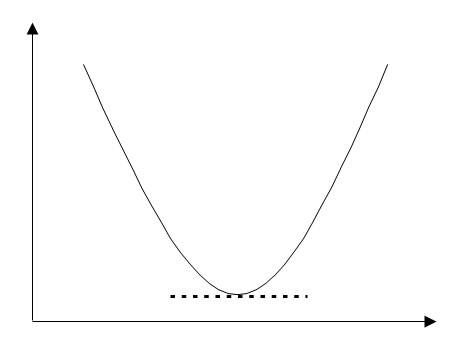

다음 그림과 같은 포물선 형태의 2차 함수라면 경사 하강법은 최초 시작점에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 $w$를 업데이트 한다.  
더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 $w$를 반환한다  

앞서 언급한 $RSS(w_0,w_1)$를 $R(w)$라 지칭하겠다.  
$R(w)$는 변수가 $w$ 파라미터로 이뤄진 함수이며, $ R(w) = \frac{1}{N} \sum_{i=1}^N (y_i-(w_0+w_1*x_i))^2$  
  
$R(w)$을 미분하여 미분 함수의 최소값을 구해야 되는데 $w_0,w_1$으로 이루어져 있기 때문에 각 파라미터에 편미분을 적용해야 한다.  
  
$R(w)$를 $w_1$, $w_0$으로 편미분한 결과는 다음와 같다.  
  
$$ \frac{\partial R(w)}{\partial w_1} = \frac{2}{N} \sum_{i=1}^N -x_t * (y_i-(w_0+w_1x_i)) =  -\frac{2}{N} \sum_{i=1}^N x_i * (실제값_i - 예측값_i)$$  
$$ \frac{\partial R(w)}{\partial w_0} = \frac{2}{N} \sum_{i=1}^N -(y_i-(w_0+w_1x_i)) =  -\frac{2}{N} \sum_{i=1}^N (실제값_i - 예측값_i)$$  
  
$w_1,w_0$의 편미분 결괏값인, $-\frac{2}{N} \sum_{i=1}^N x_i * (Actual_value_i - _i)$, $-\frac{2}{N} \sum_{i=1}^N (실제값_i - 예측값_i)$을 반복적으로 보정하면서 $w_1,w_0$값을 업데이트 하면 비용 함수 $R(w)$가 최소가 되는 $w_1,w_0$의 값을 구할 수 있다.  
  
업데이트는 새로운 $w_1$을 이전 $w_1$에서 편미분 결괏값을 마이너스(-)하면서 적용.  
즉, $$새로운 w_1 = 이전 w_1 - (-\frac{2}{N} \sum_{i=1}^N x_i * (실제값_i - 예측값_i)$$이다.  
  
위 편미분 값이 너무 클 수 있기 때문에 보정 계수($\alpha$)를 곱하는데, 이를 `학습률`이라고 한다.  
  
요약하자면, 경사 하강법은  
$$새로운 w_1 = 이전 w_1 + \alpha \frac{2}{N} \sum_{i=1}^N x_i * (실제값_i - 예측값_i)$$  
$$새로운 w_0 = 이전 w_0 + \alpha \frac{2}{N} \sum_{i=1}^N (실제값_i - 예측값_i)$$  
을 반복적으로 적용하면서 비용 함수가 최소가 되는 값을 찾는다.  
  
---  
__< 경사 하강법의 일반적인 프로세스 >__  
* __Step 1__ : $w_1,w_0$를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산  
* __Step 2__ : $w_1$을 $w_1 + \alpha \frac{2}{N} \sum_{i=1}^N x_i * (실제값_i - 예측값_i)$, $w_0$을 $w_0 + \alpha \frac{2}{N} \sum_{i=1}^N (실제값_i - 예측값_i)$으로 업데이트 한 후 다시 비용 함수의 값을 계산  
* __Step 3__ : 비용 함수의 값이 감소했응면 다시 Step 2를 반복. 더 이상 비용 함수의 값이 감소하지 않으면 그때의 $w_1, w_0$값을 구하고 반복을 중지

**실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성**

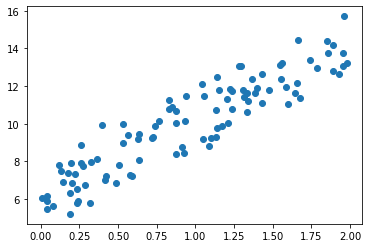

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4X + 6 식을 근사 (w1 = 4, w0 = 6), random 값은 Noise를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X ,y)
plt.show()

In [3]:
X.shape, y.shape

((100, 1), (100, 1))

#### $w_1과 w_0$의 값을 최소화 할 수 있도록 업데이트를 수행하는 함수 생성  
* 예측 배열 `y_pred`는 `np.dot(X, w1.T) + w0`임. 100개의 데이터 $X(1,2,...100)$이 있다면 예측값은 $w_0 + X(1)w_1 + X(2)w_1 + ... + X(100)w_1$이며, 이는 입력 배열 $X$와 $w_1$배열의 내적  
* 새로운 $w_1$과 $w_0$을 <u>Update</u> 함

In [4]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열을 계산하고 예측값과 실제값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1 과 w0을 업데이트할 w1_update, w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [5]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

#### 반복적으로 경사 하강법을 이용하여 `get_weight_updates()`를 호출하여 w1과 w0를 업데이트하는 함수 생성

In [15]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함.
def gradient_descent_steps(X, y, iters = 10000):
    # w1과 w0 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

#### 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [16]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


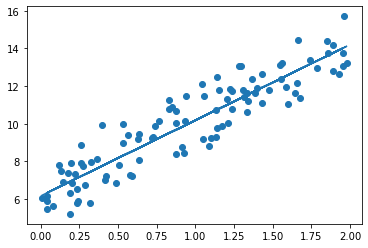

In [17]:
plt.scatter(X, y)
plt.plot(X,y_pred)
plt.show()

일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다.  
  
따라서 실전에서는 대부분 `확률적 경사 하강법(Stochastic Gradient Descent)`를 사용한다  
  
`확률적 경사 하강법`은 언제 입력 데이터로 $w$가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 $w$가 업데이트되는 값을 계산하므로 경사 하강법이나 `미니 배치 확률적 경사 하강법`을 이용해 최적 비용함수를 도출한다

#### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

In [24]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size 만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [25]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


큰 데이터를 처리할 경우에는 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 사용한다